In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_excel('Data_sets/aqi_hourly_dataset.xlsx')

In [67]:
df.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM 2.5,O3
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7


In [70]:
df.shape

(30033, 6)

In [72]:
df.isnull().sum()

DATE                   0
Precipitation         44
Temperature          186
Relative Humidity    191
PM 2.5               479
O3                     0
dtype: int64

In [74]:
df.fillna(df.select_dtypes(exclude=['category','object']).mean(), inplace=True)

In [76]:
df.isnull().sum()

DATE                 0
Precipitation        0
Temperature          0
Relative Humidity    0
PM 2.5               0
O3                   0
dtype: int64

In [78]:

# Calculate AQI for PM 2.5
def calculate_aqi_pm25(concentration):
    if concentration <= 12.0:
        I_low, I_high, AQI_low, AQI_high = 0.0, 12.0, 0, 50
    elif concentration <= 35.4:
        I_low, I_high, AQI_low, AQI_high = 12.1, 35.4, 51, 100
    elif concentration <= 55.4:
        I_low, I_high, AQI_low, AQI_high = 35.5, 55.4, 101, 150
    elif concentration <= 150.4:
        I_low, I_high, AQI_low, AQI_high = 55.5, 150.4, 151, 200
    elif concentration <= 250.4:
        I_low, I_high, AQI_low, AQI_high = 150.5, 250.4, 201, 300
    elif concentration <= 500.4:
        I_low, I_high, AQI_low, AQI_high = 250.5, 500.4, 301, 500
    else:
        return 500  # AQI values above 500 are not common
    
    aqi_pm25 = ((concentration - I_low) * (AQI_high - AQI_low)) / (I_high - I_low) + AQI_low
    return round(aqi_pm25)

# Calculate AQI for O3
def calculate_aqi_o3(concentration):
    if concentration <= 54:
        I_low, I_high, AQI_low, AQI_high = 0.0, 54.0, 0, 50
    elif concentration <= 70:
        I_low, I_high, AQI_low, AQI_high = 55.0, 70.0, 51, 100
    elif concentration <= 85:
        I_low, I_high, AQI_low, AQI_high = 71.0, 85.0, 101, 150
    elif concentration <= 105:
        I_low, I_high, AQI_low, AQI_high = 86.0, 105.0, 151, 200
    elif concentration <= 200:
        I_low, I_high, AQI_low, AQI_high = 106.0, 200.0, 201, 300
    elif concentration <= 400:
        I_low, I_high, AQI_low, AQI_high = 201.0, 400.0, 301, 500
    else:
        return 500  # AQI values above 500 are not common
    
    aqi_o3 = ((concentration - I_low) * (AQI_high - AQI_low)) / (I_high - I_low) + AQI_low
    return round(aqi_o3)

# Function to classify AQI
def classify_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Calculate AQI and classify into categories for PM 2.5
df['AQI_PM2.5'] = df['PM 2.5'].apply(calculate_aqi_pm25)
df['AQI_Category_PM2.5'] = df['AQI_PM2.5'].apply(classify_aqi)

# Calculate AQI and classify into categories for O3
df['AQI_O3'] = df['O3'].apply(calculate_aqi_o3)
df['AQI_Category_O3'] = df['AQI_O3'].apply(classify_aqi)

In [80]:
df.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM 2.5,O3,AQI_PM2.5,AQI_Category_PM2.5,AQI_O3,AQI_Category_O3
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,86,Moderate,4,Good
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,83,Moderate,4,Good
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,79,Moderate,4,Good
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,70,Moderate,6,Good
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,75,Moderate,6,Good


In [82]:
# Calculate AQI and classify into categories for PM 2.5
df['AQI_PM2.5'] = df['PM 2.5'].apply(calculate_aqi_pm25)
df['AQI_Category_PM2.5'] = df['AQI_PM2.5'].apply(classify_aqi)

# Calculate AQI and classify into categories for O3
df['AQI_O3'] = df['O3'].apply(calculate_aqi_o3)
df['AQI_Category_O3'] = df['AQI_O3'].apply(classify_aqi)

# Determine the overall AQI (maximum of PM 2.5 and O3 AQI)
df['Overall_AQI'] = df[['AQI_PM2.5', 'AQI_O3']].max(axis=1)

# Classify overall AQI into categories
df['Overall_AQI_Category'] = df['Overall_AQI'].apply(classify_aqi)

In [84]:
df.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM 2.5,O3,AQI_PM2.5,AQI_Category_PM2.5,AQI_O3,AQI_Category_O3,Overall_AQI,Overall_AQI_Category
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,86,Moderate,4,Good,86,Moderate
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,83,Moderate,4,Good,83,Moderate
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,79,Moderate,4,Good,79,Moderate
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,70,Moderate,6,Good,70,Moderate
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,75,Moderate,6,Good,75,Moderate


In [86]:
df['Overall_AQI_Category'].value_counts()

Overall_AQI_Category
Moderate                          10685
Unhealthy                         10292
Unhealthy for Sensitive Groups     6032
Good                               2322
Very Unhealthy                      560
Hazardous                           142
Name: count, dtype: int64

In [88]:
df.to_csv('Data_sets/filtered_data.csv',index=False)

In [90]:
# Load the CSV file
file_path = 'Data_sets/filtered_data.csv'  # Update the file path as needed
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,DATE,Precipitation,Temperature,Relative Humidity,PM 2.5,O3,AQI_PM2.5,AQI_Category_PM2.5,AQI_O3,AQI_Category_O3,Overall_AQI,Overall_AQI_Category
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,86,Moderate,4,Good,86,Moderate
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,83,Moderate,4,Good,83,Moderate
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,79,Moderate,4,Good,79,Moderate
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,70,Moderate,6,Good,70,Moderate
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,75,Moderate,6,Good,75,Moderate


In [92]:
data.isnull().sum()

DATE                    0
Precipitation           0
Temperature             0
Relative Humidity       0
PM 2.5                  0
O3                      0
AQI_PM2.5               0
AQI_Category_PM2.5      0
AQI_O3                  0
AQI_Category_O3         0
Overall_AQI             0
Overall_AQI_Category    0
dtype: int64

In [94]:
data.value_counts()

DATE                 Precipitation  Temperature  Relative Humidity  PM 2.5  O3  AQI_PM2.5  AQI_Category_PM2.5              AQI_O3  AQI_Category_O3  Overall_AQI  Overall_AQI_Category          
2020-09-17 03:00:00  0.0            22.1         84.5               28.9    4   86         Moderate                        4       Good             86           Moderate                          1
2023-01-06 17:00:00  0.0            17.5         63.2               46.5    13  128        Unhealthy for Sensitive Groups  12      Good             128          Unhealthy for Sensitive Groups    1
2023-01-07 05:00:00  0.0            10.9         99.8               112.2   32  180        Unhealthy                       30      Good             180          Unhealthy                         1
2023-01-07 04:00:00  0.0            11.2         99.1               109.5   36  179        Unhealthy                       33      Good             179          Unhealthy                         1
2023-01-07 03:00:00 

In [96]:
# Convert the DATE column to datetime type if it's not already
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract date and time components
data['year'] = data['DATE'].dt.year
data['month'] = data['DATE'].dt.month
data['day'] = data['DATE'].dt.day
data['hour'] = data['DATE'].dt.hour

# Drop the original DATE column if not needed
# For time series forecasting, we might want to keep it as the index
data.set_index('DATE', inplace=True)


In [98]:
data.head()

,Precipitation,Temperature,Relative Humidity,PM 2.5,O3,AQI_PM2.5,AQI_Category_PM2.5,AQI_O3,AQI_Category_O3,Overall_AQI,Overall_AQI_Category,year,month,day,hour
DATE,,,,,,,,,,,,,,,
2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,86,Moderate,4,Good,86,Moderate,2020,9,17,3
2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,83,Moderate,4,Good,83,Moderate,2020,9,17,4
2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,79,Moderate,4,Good,79,Moderate,2020,9,17,5
2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,70,Moderate,6,Good,70,Moderate,2020,9,17,6
2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,75,Moderate,6,Good,75,Moderate,2020,9,17,7


In [100]:
df['Overall_AQI_Category'].value_counts()

Overall_AQI_Category
Moderate                          10685
Unhealthy                         10292
Unhealthy for Sensitive Groups     6032
Good                               2322
Very Unhealthy                      560
Hazardous                           142
Name: count, dtype: int64

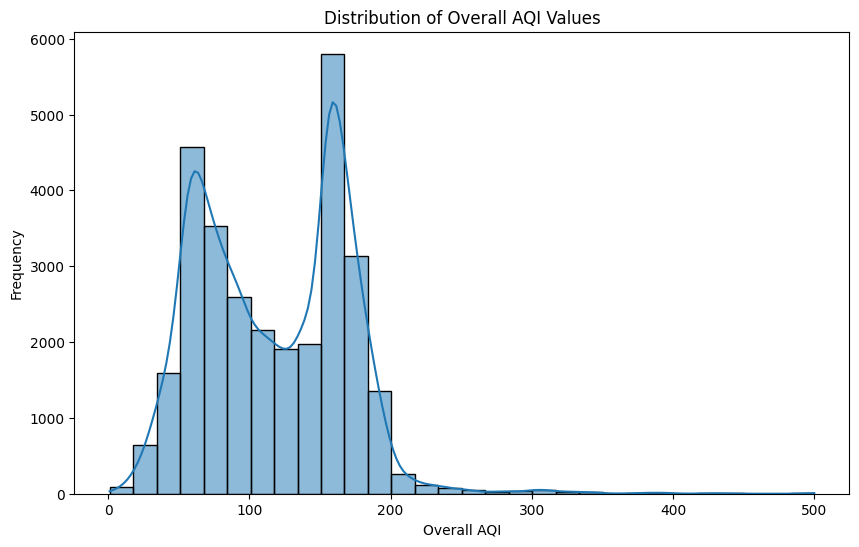

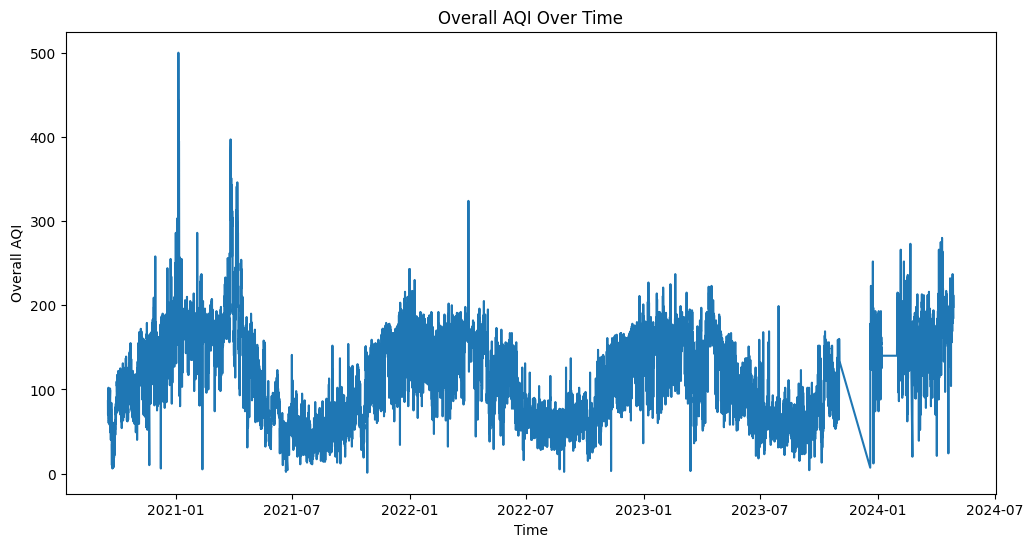

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Overall AQI values
plt.figure(figsize=(10, 6))
sns.histplot(data['Overall_AQI'], bins=30, kde=True)
plt.title('Distribution of Overall AQI Values')
plt.xlabel('Overall AQI')
plt.ylabel('Frequency')
plt.show()

# Plot Overall AQI over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Overall_AQI'])
plt.title('Overall AQI Over Time')
plt.xlabel('Time')
plt.ylabel('Overall AQI')
plt.show()


In [104]:
df.tail()

,DATE,Precipitation,Temperature,Relative Humidity,PM 2.5,O3,AQI_PM2.5,AQI_Category_PM2.5,AQI_O3,AQI_Category_O3,Overall_AQI,Overall_AQI_Category
30028,2024-04-27 09:00:00,0.0,25.0,88.9,161.3,3,212,Very Unhealthy,3,Good,212,Very Unhealthy
30029,2024-04-27 10:00:00,0.0,27.0,71.2,158.1,4,209,Very Unhealthy,4,Good,209,Very Unhealthy
30030,2024-04-27 11:00:00,0.0,28.1,55.7,160.7,6,211,Very Unhealthy,6,Good,211,Very Unhealthy
30031,2024-04-27 12:00:00,0.0,27.0,67.5,152.8,9,203,Very Unhealthy,8,Good,203,Very Unhealthy
30032,2024-04-27 13:00:00,0.0,27.1,68.4,146.5,14,198,Unhealthy,13,Good,198,Unhealthy


In [106]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib



# Features and target variables
X_regression = data[['Precipitation', 'Temperature', 'Relative Humidity', 'PM 2.5', 'O3', 'day', 'hour', 'month', 'year']]
y_regression = data['Overall_AQI']

# Split data into training and testing sets
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Initialize the regression model (Random Forest Regressor)
model_regression = RandomForestRegressor(random_state=42)

# Train the model
model_regression.fit(X_train_regression, y_train_regression)

# Save the model
joblib.dump(model_regression, r'E:\Real_time_AQI Prediction\ML_Model\regression_model.pkl')

# Optionally, you can evaluate the model using metrics like R-squared, MSE, RMSE, etc.


['E:\\Real_time_AQI Prediction\\ML_Model\\regression_model.pkl']

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Features and target variables for classification
X_classification = data[['Precipitation', 'Temperature', 'Relative Humidity', 'PM 2.5', 'O3', 'day', 'hour', 'month', 'year']]
y_classification = data['Overall_AQI_Category']

# Encode categorical target variable
le = LabelEncoder()
y_classification_encoded = le.fit_transform(y_classification)

# Split data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification_encoded, test_size=0.2, random_state=42)

# Initialize and train the classification model
model_classification = RandomForestClassifier(random_state=42)
model_classification.fit(X_train_classification, y_train_classification)

# Save the model
joblib.dump(model_classification, r'E:\Real_time_AQI Prediction\ML_Model\classification_model.pkl')

# Optionally, you can evaluate the classification model using metrics like accuracy, confusion matrix, classification report, etc.


['E:\\Real_time_AQI Prediction\\ML_Model\\classification_model.pkl']

In [112]:
# data_preparation_eda.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Sample Data Preparation
data = pd.read_csv('Data_sets/filtered_data.csv')

In [116]:
data.head()

,DATE,Precipitation,Temperature,Relative Humidity,PM 2.5,O3,AQI_PM2.5,AQI_Category_PM2.5,AQI_O3,AQI_Category_O3,Overall_AQI,Overall_AQI_Category
0,2020-09-17 03:00:00,0.0,22.1,84.5,28.9,4,86,Moderate,4,Good,86,Moderate
1,2020-09-17 04:00:00,0.0,22.8,80.7,27.5,4,83,Moderate,4,Good,83,Moderate
2,2020-09-17 05:00:00,0.0,24.1,74.9,25.5,4,79,Moderate,4,Good,79,Moderate
3,2020-09-17 06:00:00,0.0,25.5,70.9,21.3,6,70,Moderate,6,Good,70,Moderate
4,2020-09-17 07:00:00,0.0,25.5,69.6,23.6,7,75,Moderate,6,Good,75,Moderate


In [118]:
# data_preparation.py
import pandas as pd

# Load the data
data = pd.read_csv('Data_sets/filtered_data.csv')

# Drop the specified columns
columns_to_drop = [
    'AQI_PM2.5', 'AQI_Category_PM2.5', 'AQI_O3', 'AQI_Category_O3',
    'Precipitation', 'Temperature', 'Relative Humidity'
]
data_cleaned = data.drop(columns=columns_to_drop)

# Save the cleaned data for further use
data_cleaned.to_csv('Data_sets/cleaned_data.csv', index=False)

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Load your data (adjust path as necessary)
data_cleaned = pd.read_csv('Data_sets/cleaned_data.csv')

In [131]:
data_cleaned.head()

,DATE,PM 2.5,O3,Overall_AQI,Overall_AQI_Category
0,2020-09-17 03:00:00,28.9,4,86,Moderate
1,2020-09-17 04:00:00,27.5,4,83,Moderate
2,2020-09-17 05:00:00,25.5,4,79,Moderate
3,2020-09-17 06:00:00,21.3,6,70,Moderate
4,2020-09-17 07:00:00,23.6,7,75,Moderate


In [133]:
data_cleaned.columns

Index(['DATE', 'PM 2.5', 'O3', 'Overall_AQI', 'Overall_AQI_Category'], dtype='object')

In [135]:
data_cleaned['Overall_AQI_Category'].value_counts()

Overall_AQI_Category
Moderate                          10685
Unhealthy                         10292
Unhealthy for Sensitive Groups     6032
Good                               2322
Very Unhealthy                      560
Hazardous                           142
Name: count, dtype: int64

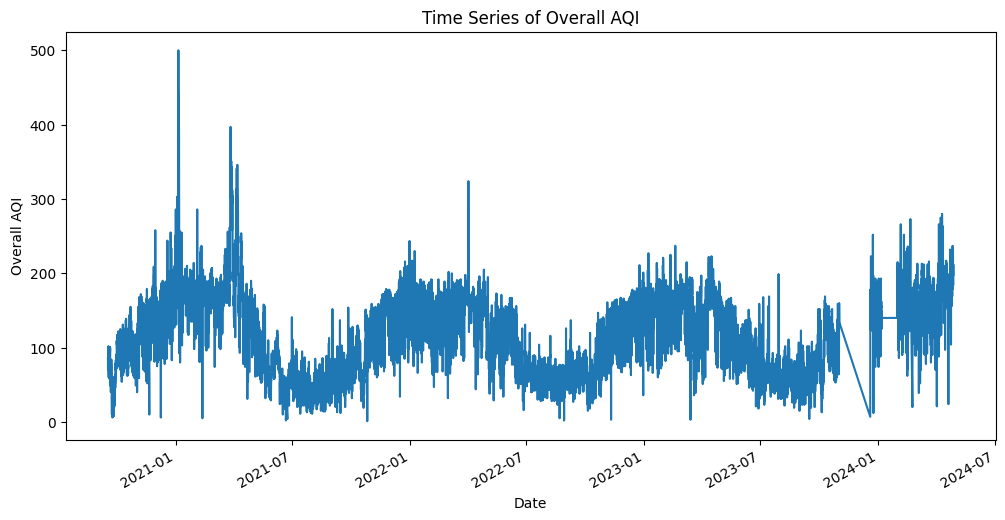

C:\Users\thoma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\thoma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\thoma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\thoma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

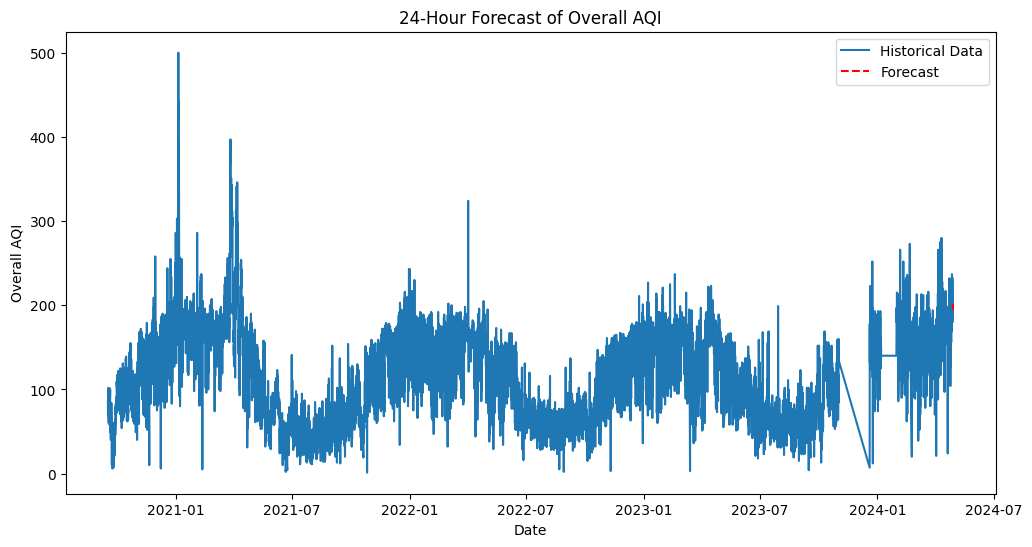

                     DATE    Forecast
30033 2024-04-27 14:00:00  195.712673
30034 2024-04-27 15:00:00  195.438419
30035 2024-04-27 16:00:00  195.882603
30036 2024-04-27 17:00:00  198.060407
30037 2024-04-27 18:00:00  199.644221
30038 2024-04-27 19:00:00  200.527674
30039 2024-04-27 20:00:00  200.749541
30040 2024-04-27 21:00:00  200.484582
30041 2024-04-27 22:00:00  199.849790
30042 2024-04-27 23:00:00  199.323941
30043 2024-04-28 00:00:00  199.002658
30044 2024-04-28 01:00:00  198.911940
30045 2024-04-28 02:00:00  199.006366
30046 2024-04-28 03:00:00  199.200862
30047 2024-04-28 04:00:00  199.377178
30048 2024-04-28 05:00:00  199.489759
30049 2024-04-28 06:00:00  199.523759
30050 2024-04-28 07:00:00  199.494189
30051 2024-04-28 08:00:00  199.432915
30052 2024-04-28 09:00:00  199.373935
30053 2024-04-28 10:00:00  199.335176
30054 2024-04-28 11:00:00  199.322623
30055 2024-04-28 12:00:00  199.331416
30056 2024-04-28 13:00:00  199.350960


In [137]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load and prepare data (replace this with your actual data loading process)
data_df = pd.read_csv('Data_sets/cleaned_data.csv')
data_df['DATE'] = pd.to_datetime(data_df['DATE'])
data_df.set_index('DATE', inplace=True)
data_df = data_df.sort_index()

# Prepare data for ARIMA
ts = data_df['Overall_AQI']

# Plot the time series
ts.plot(figsize=(12, 6))
plt.title('Time Series of Overall AQI')
plt.xlabel('Date')
plt.ylabel('Overall AQI')
plt.show()

# Fit ARIMA model
model = ARIMA(ts, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 24 hours
forecast = model_fit.forecast(steps=24)

# Create a date range for the future period
future_dates = pd.date_range(start=ts.index[-1] + pd.Timedelta(hours=1), periods=24, freq='H')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'DATE': future_dates, 'Forecast': forecast})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Historical Data')
plt.plot(forecast_df['DATE'], forecast_df['Forecast'], color='red', linestyle='--', label='Forecast')
plt.title('24-Hour Forecast of Overall AQI')
plt.xlabel('Date')
plt.ylabel('Overall AQI')
plt.legend()
plt.show()

# Print forecast results
print(forecast_df)

In [139]:
import pickle
# Save the model to a file
with open('ML_Model/arima_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)

C:\Users\thoma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\thoma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\thoma\AppData\Local\Temp\ipykernel_12684\2663920919.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start=current_time, periods=forecast_steps + 1, freq='H')[1:]


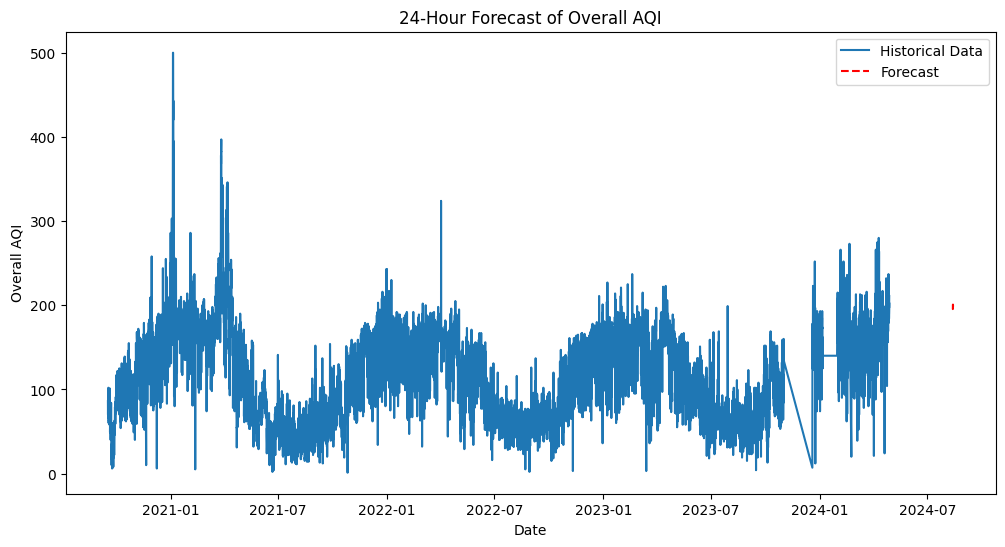

                            DATE    Forecast
30033 2024-08-12 21:28:42.210848  195.712673
30034 2024-08-12 22:28:42.210848  195.438419
30035 2024-08-12 23:28:42.210848  195.882603
30036 2024-08-13 00:28:42.210848  198.060407
30037 2024-08-13 01:28:42.210848  199.644221
30038 2024-08-13 02:28:42.210848  200.527674
30039 2024-08-13 03:28:42.210848  200.749541
30040 2024-08-13 04:28:42.210848  200.484582
30041 2024-08-13 05:28:42.210848  199.849790
30042 2024-08-13 06:28:42.210848  199.323941
30043 2024-08-13 07:28:42.210848  199.002658
30044 2024-08-13 08:28:42.210848  198.911940
30045 2024-08-13 09:28:42.210848  199.006366
30046 2024-08-13 10:28:42.210848  199.200862
30047 2024-08-13 11:28:42.210848  199.377178
30048 2024-08-13 12:28:42.210848  199.489759
30049 2024-08-13 13:28:42.210848  199.523759
30050 2024-08-13 14:28:42.210848  199.494189
30051 2024-08-13 15:28:42.210848  199.432915
30052 2024-08-13 16:28:42.210848  199.373935
30053 2024-08-13 17:28:42.210848  199.335176
30054 2024

In [141]:
import pandas as pd
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

# Load the saved ARIMA model
with open('ML_Model/arima_model.pkl', 'rb') as f:
    model_fit = pickle.load(f)

# Forecast the next 24 hours from the current date and time
forecast_steps = 24
forecast = model_fit.forecast(steps=forecast_steps)

# Get current date and time
current_time = datetime.now()

# Create a date range starting from the current time
future_dates = pd.date_range(start=current_time, periods=forecast_steps + 1, freq='H')[1:]

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'DATE': future_dates, 'Forecast': forecast})

# Plot the results
plt.figure(figsize=(12, 6))
ts = pd.read_csv('Data_sets/cleaned_data.csv', index_col='DATE', parse_dates=True)['Overall_AQI']  # Reload historical data for plotting
plt.plot(ts, label='Historical Data')
plt.plot(forecast_df['DATE'], forecast_df['Forecast'], color='red', linestyle='--', label='Forecast')
plt.title('24-Hour Forecast of Overall AQI')
plt.xlabel('Date')
plt.ylabel('Overall AQI')
plt.legend()
plt.show()

# Print forecast results
print(forecast_df)


In [143]:
import pandas as pd
data_prof=pd.read_csv('Data_sets/cleaned_data.csv')
# Ensure DATE column is in datetime format
data_prof['DATE'] = pd.to_datetime(data_prof['DATE'])
data_prof.set_index('DATE', inplace=True)



In [145]:
data_prof = data_prof.resample('h').ffill()  # Fill forward for missing values


In [ ]:
!pip install prophet 

In [147]:
# Reset index and rename columns for Prophet
df_prophet = data_prof.reset_index()
df_prophet.rename(columns={'DATE': 'ds', 'Overall_AQI': 'y'}, inplace=True)


In [149]:
from prophet import Prophet

# Initialize and fit the model
model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_prophet)


20:29:54 - cmdstanpy - INFO - Chain [1] start processing
20:30:11 - cmdstanpy - INFO - Chain [1] done processing


In [150]:
# Define future dates for prediction
future_dates = pd.date_range(start='2024-04-27 14:00:00', end='2024-12-08 17:00:00', freq='H')
future_df = pd.DataFrame(future_dates, columns=['ds'])

# Forecast
forecast = model.predict(future_df)

# Extract relevant columns
forecasted_aqi = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


C:\Users\thoma\AppData\Local\Temp\ipykernel_12684\1502965706.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start='2024-04-27 14:00:00', end='2024-12-08 17:00:00', freq='H')


C:\Users\thoma\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\thoma\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


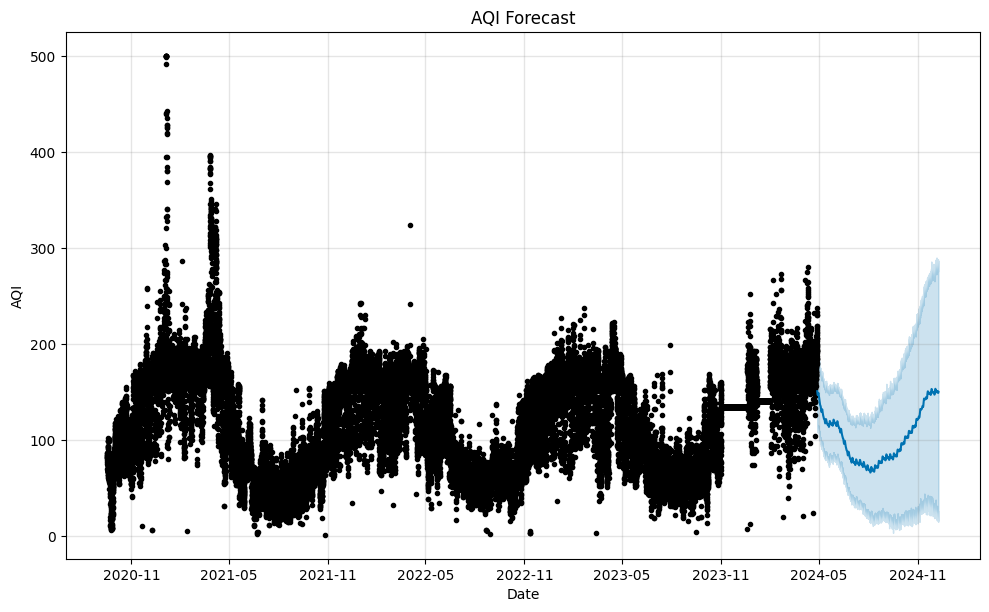

In [151]:
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.title('AQI Forecast')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()


In [152]:
print(forecasted_aqi.head(24))  # Show the first 24 hours of the forecast

                    ds        yhat  yhat_lower  yhat_upper
0  2024-04-27 14:00:00  150.628898  115.250782  186.776736
1  2024-04-27 15:00:00  150.385022  112.692811  184.737650
2  2024-04-27 16:00:00  150.138947  114.021009  185.223297
3  2024-04-27 17:00:00  149.891997  114.353999  189.883992
4  2024-04-27 18:00:00  149.645543  113.352984  186.864562
5  2024-04-27 19:00:00  149.400987  114.363861  184.683691
6  2024-04-27 20:00:00  149.159754  109.496794  185.815982
7  2024-04-27 21:00:00  148.923271  112.015157  184.711909
8  2024-04-27 22:00:00  148.692957  111.439440  183.275424
9  2024-04-27 23:00:00  148.470203  111.591649  183.466587
10 2024-04-28 00:00:00  148.256362  110.879122  183.406103
11 2024-04-28 01:00:00  148.052728  112.884939  182.372745
12 2024-04-28 02:00:00  147.860531  110.651479  183.467156
13 2024-04-28 03:00:00  147.680913  110.021942  185.158773
14 2024-04-28 04:00:00  147.514922  111.119470  179.500807
15 2024-04-28 05:00:00  147.363498  108.648439  183.3717

In [153]:
# Define the current time
current_time = pd.Timestamp.now()

# Create a DataFrame for the next 24 hours
future_dates = pd.date_range(start=current_time, periods=24, freq='h')
future_df = pd.DataFrame(future_dates, columns=['ds'])


In [154]:
# Predict future AQI
forecast = model.predict(future_df)
forecasted_aqi = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


In [155]:
# Save the forecasted data to a CSV file
forecasted_aqi.to_csv('forecasted_aqi_24_hours.csv', index=False)


                           ds       yhat  yhat_lower  yhat_upper
0  2024-08-12 20:30:12.423975  73.310152   35.823421  110.975615
1  2024-08-12 21:30:12.423975  73.368397   39.233007  113.601233
2  2024-08-12 22:30:12.423975  73.410958   33.033521  108.349771
3  2024-08-12 23:30:12.423975  73.438242   40.269160  109.196847
4  2024-08-13 00:30:12.423975  73.450774   38.785280  109.876500
5  2024-08-13 01:30:12.423975  73.449193   38.398365  110.726455
6  2024-08-13 02:30:12.423975  73.434237   38.188272  108.312938
7  2024-08-13 03:30:12.423975  73.406741   35.239384  110.224853
8  2024-08-13 04:30:12.423975  73.367615   39.112850  108.751977
9  2024-08-13 05:30:12.423975  73.317842   36.400937  109.319791
10 2024-08-13 06:30:12.423975  73.258457   36.301126  109.867502
11 2024-08-13 07:30:12.423975  73.190542   36.646357  110.166902
12 2024-08-13 08:30:12.423975  73.115206   38.453124  109.758880
13 2024-08-13 09:30:12.423975  73.033576   36.810301  108.277916
14 2024-08-13 10:30:12.42

C:\Users\thoma\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\thoma\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


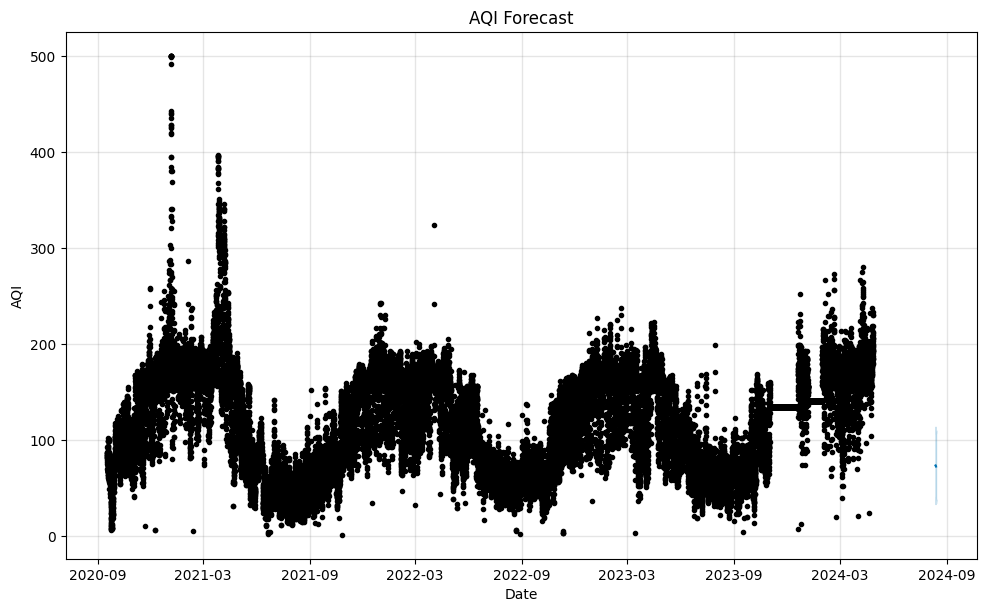

In [156]:
# Display the forecasted AQI for the next 24 hours
print(forecasted_aqi)

# Optionally, plot the forecast
fig = model.plot(forecast)
plt.title('AQI Forecast')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()


20:30:13 - cmdstanpy - INFO - Chain [1] start processing
20:30:31 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\thoma\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\thoma\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


                           ds       yhat  yhat_lower  yhat_upper
0  2024-08-12 20:30:31.367604  73.310501   35.235285  108.137427
1  2024-08-12 21:30:31.367604  73.368663   37.107312  110.736965
2  2024-08-12 22:30:31.367604  73.411142   37.931940  107.881873
3  2024-08-12 23:30:31.367604  73.438346   35.956619  107.661680
4  2024-08-13 00:30:31.367604  73.450802   37.472366  109.886864
5  2024-08-13 01:30:31.367604  73.449148   35.567567  109.300804
6  2024-08-13 02:30:31.367604  73.434124   37.555628  112.203796
7  2024-08-13 03:30:31.367604  73.406564   38.512183  112.301379
8  2024-08-13 04:30:31.367604  73.367380   38.430088  110.751459
9  2024-08-13 05:30:31.367604  73.317553   36.881508  110.219676
10 2024-08-13 06:30:31.367604  73.258120   36.869249  111.823410
11 2024-08-13 07:30:31.367604  73.190163   37.613223  107.960878
12 2024-08-13 08:30:31.367604  73.114790   40.361180  108.498346
13 2024-08-13 09:30:31.367604  73.033130   35.657948  109.233965
14 2024-08-13 10:30:31.36

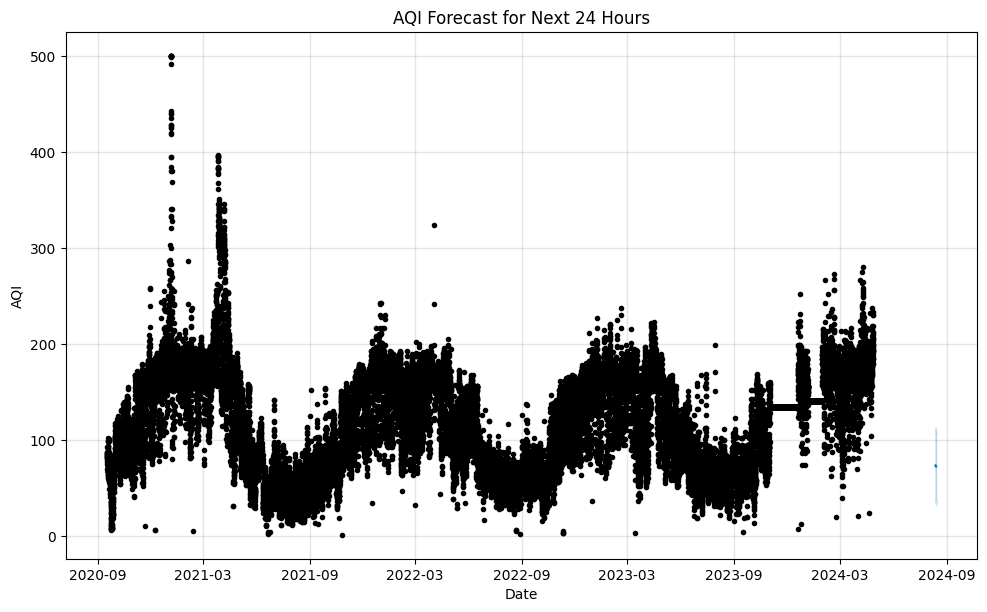

In [157]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming data_cleaned is already available and preprocessed
data_cleaned=pd.read_csv('Data_sets/cleaned_data.csv')
# Ensure DATE column is in datetime format
data_cleaned['DATE'] = pd.to_datetime(data_cleaned['DATE'])
data_cleaned.set_index('DATE', inplace=True)

# Resample data to hourly frequency (if needed)
data_cleaned = data_cleaned.resample('h').ffill()

# Prepare data for Prophet
df_prophet = data_cleaned.reset_index()
df_prophet.rename(columns={'DATE': 'ds', 'Overall_AQI': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_prophet)

# Define the current time
current_time = pd.Timestamp.now()

# Create a DataFrame for the next 24 hours
future_dates = pd.date_range(start=current_time, periods=24, freq='h')
future_df = pd.DataFrame(future_dates, columns=['ds'])

# Predict future AQI
forecast = model.predict(future_df)
forecasted_aqi = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Display the forecasted AQI for the next 24 hours
print(forecasted_aqi)

# Save the forecasted data to a CSV file (optional)
forecasted_aqi.to_csv('forecasted_aqi_24_hours.csv', index=False)

# Plot the forecast (optional)
fig = model.plot(forecast)
plt.title('AQI Forecast for Next 24 Hours')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()


In [158]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [163]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'ML_Model/prophet_aqi_model.pkl')


['ML_Model/prophet_aqi_model.pkl']

In [160]:
# Load the model from the file
model = joblib.load('ML_Model/prophet_aqi_model.pkl')


20:30:36 - cmdstanpy - INFO - Chain [1] start processing
20:30:55 - cmdstanpy - INFO - Chain [1] done processing


                           ds       yhat  yhat_lower  yhat_upper
0  2024-08-12 20:30:55.998999  73.310942   33.788991  109.992839
1  2024-08-12 21:30:55.998999  73.368997   37.122501  111.675071
2  2024-08-12 22:30:55.998999  73.411374   38.590570  108.809142
3  2024-08-12 23:30:55.998999  73.438478   35.428680  106.629351
4  2024-08-13 00:30:55.998999  73.450837   36.795051  108.393562
5  2024-08-13 01:30:55.998999  73.449091   37.241419  109.659720
6  2024-08-13 02:30:55.998999  73.433982   37.430556  109.674417
7  2024-08-13 03:30:55.998999  73.406341   36.681677  109.413122
8  2024-08-13 04:30:55.998999  73.367082   38.592214  110.681937
9  2024-08-13 05:30:55.998999  73.317187   40.335075  110.823710
10 2024-08-13 06:30:55.998999  73.257694   38.464205  109.296998
11 2024-08-13 07:30:55.998999  73.189684   35.193841  107.584209
12 2024-08-13 08:30:55.998999  73.114266   35.263869  112.063304
13 2024-08-13 09:30:55.998999  73.032568   36.469797  110.115568
14 2024-08-13 10:30:55.99

C:\Users\thoma\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\thoma\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


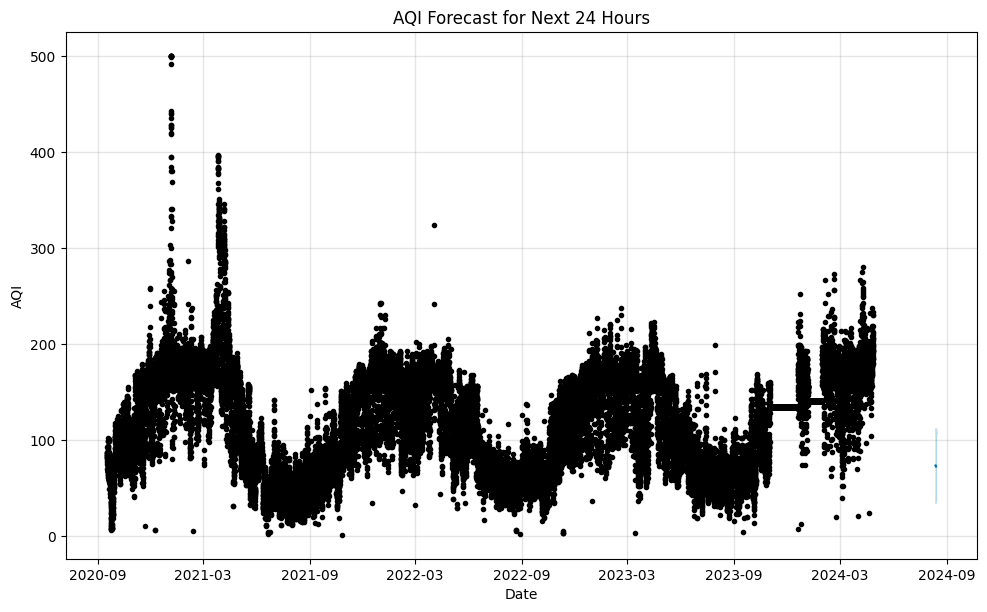

In [161]:
import pandas as pd
from prophet import Prophet
import joblib
import matplotlib.pyplot as plt

# Assuming data_cleaned is already available and preprocessed

data_cleaned=pd.read_csv('Data_sets/cleaned_data.csv')
# Ensure DATE column is in datetime format
data_cleaned['DATE'] = pd.to_datetime(data_cleaned['DATE'])
data_cleaned.set_index('DATE', inplace=True)

# Resample data to hourly frequency (if needed)
data_cleaned = data_cleaned.resample('h').ffill()

# Prepare data for Prophet
df_prophet = data_cleaned.reset_index()
df_prophet.rename(columns={'DATE': 'ds', 'Overall_AQI': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_prophet)

# Save the trained model to a file
joblib.dump(model, 'prophet_aqi_model.pkl')

# Define the current time
current_time = pd.Timestamp.now()

# Create a DataFrame for the next 24 hours
future_dates = pd.date_range(start=current_time, periods=24, freq='h')
future_df = pd.DataFrame(future_dates, columns=['ds'])

# Predict future AQI
forecast = model.predict(future_df)
forecasted_aqi = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Display the forecasted AQI for the next 24 hours
print(forecasted_aqi)

# Save the forecasted data to a CSV file (optional)
forecasted_aqi.to_csv('forecasted_aqi_24_hours.csv', index=False)

# Plot the forecast (optional)
fig = model.plot(forecast)
plt.title('AQI Forecast for Next 24 Hours')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

# To load the model later
# model = joblib.load('prophet_aqi_model.pkl')


20:55:19 - cmdstanpy - INFO - Chain [1] start processing
20:55:43 - cmdstanpy - INFO - Chain [1] done processing


Model saved to ML_Model/prophet_model.pkl
                           ds       yhat  yhat_lower  yhat_upper
0  2024-08-12 20:55:43.414543  73.336860   38.498591  107.226434
1  2024-08-12 21:55:43.414543  73.388393   36.011381  109.411874
2  2024-08-12 22:55:43.414543  73.424401   37.078967  111.617343
3  2024-08-12 23:55:43.414543  73.445340   37.275221  109.881323
4  2024-08-13 00:55:43.414543  73.451786   34.938260  109.497687
5  2024-08-13 01:55:43.414543  73.444421   37.752925  108.997312
6  2024-08-13 02:55:43.414543  73.424025   36.836540  109.035359
7  2024-08-13 03:55:43.414543  73.391467   35.609220  108.168697
8  2024-08-13 04:55:43.414543  73.347690   38.906294  108.937967
9  2024-08-13 05:55:43.414543  73.293700   37.268840  109.638967
10 2024-08-13 06:55:43.414543  73.230553   37.365747  108.554604
11 2024-08-13 07:55:43.414543  73.159345   37.878962  109.420133
12 2024-08-13 08:55:43.414543  73.081194   38.797274  109.274091
13 2024-08-13 09:55:43.414543  72.997230   36.94

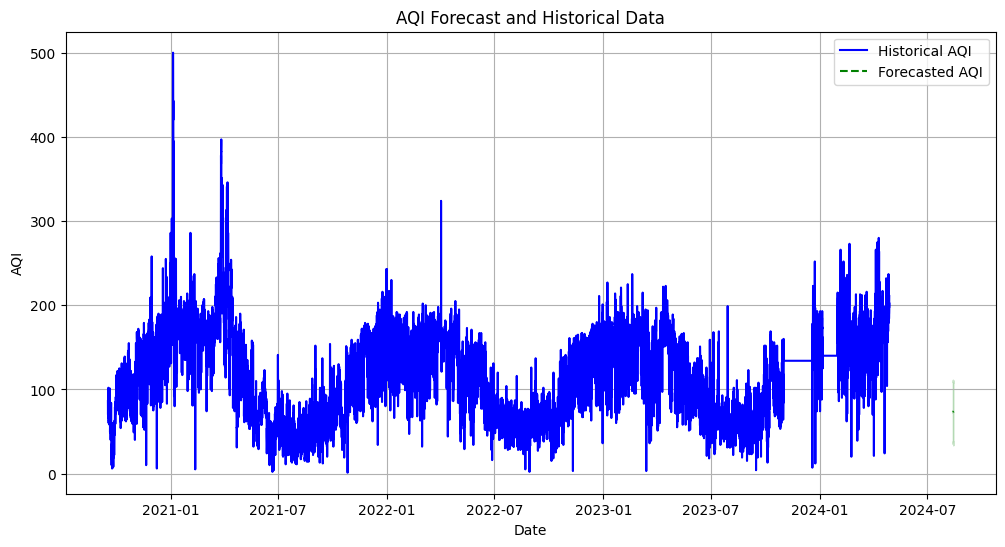

In [190]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import joblib  # Import joblib for saving the model

# Load and preprocess data
data_cleaned = pd.read_csv('Data_sets/cleaned_data.csv')
data_cleaned['DATE'] = pd.to_datetime(data_cleaned['DATE'])
data_cleaned.set_index('DATE', inplace=True)
data_cleaned = data_cleaned.resample('h').ffill()

# Prepare data for Prophet
df_prophet = data_cleaned.reset_index()
df_prophet.rename(columns={'DATE': 'ds', 'Overall_AQI': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_prophet)

# Save the fitted model to a file
model_filename = 'ML_Model/prophet_model.pkl'
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Define the current time
current_time = pd.Timestamp.now()

# Create a DataFrame for the next 24 hours
future_dates = pd.date_range(start=current_time, periods=24, freq='h')
future_df = pd.DataFrame(future_dates, columns=['ds'])

# Predict future AQI
forecast = model.predict(future_df)

# Display the forecasted AQI for the next 24 hours
forecasted_aqi = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(forecasted_aqi)

# Save the forecasted data to a CSV file (optional)
forecasted_aqi.to_csv('forecasted_aqi_24_hours.csv', index=False)

# Plot the historical and forecast data
fig, ax = plt.subplots(figsize=(12, 6))

# Plot historical data
ax.plot(df_prophet['ds'], df_prophet['y'], label='Historical AQI', color='blue')

# Plot forecast data
ax.plot(forecast['ds'], forecast['yhat'], label='Forecasted AQI', color='green', linestyle='--')

# Plot confidence intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.2)

# Add titles and labels
ax.set_title('AQI Forecast and Historical Data')
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()
